# Problem Statement - 
### Given the input data which is the individual shares of preference for each product per each respondent you need to transform the data and to perform cluster analysis in R, Python or SPSS to identify grouping by cases of data based on the similarity of shares. After the clusters are build, we need a visual export of an dendrogram and a written explanation of each cluster i.e. what is the reasoning behind those groupings. The output can be done in 1 PowerPoint slide





In [1]:
# Data Import and Analysis
import numpy as np
import pandas as pd
import xlrd
from sklearn.preprocessing import StandardScaler


# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interactive, VBox
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans


# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
data = pd.read_excel('SDT data.xlsx')

In [3]:
data.head()

ID  Coca-Cola 0,5l PET  Coca-Cola 0,25l Sleek can  \
0  2878.0            0.282215                   0.004441   
1  2881.0            0.006717                   0.012910   
2  2882.0            0.000675                   0.001698   
3  2884.0            0.003455                   0.006337   
4  2886.0            0.050186                   0.005718   

   Coca-Cola 0,33l Can 15-pack  Coca-Cola 0,33l Can  \
0                     0.012106             0.028150   
1                     0.059791             0.009791   
2                     0.042056             0.002441   
3                     0.043434             0.013191   
4                     0.004105             0.006571   

   Coca-Cola 1,5l PET 2-pack  Coca-Cola 1,5l PET  Coca-Cola Zero 0,5l PET  \
0                   0.160348            0.028677                 0.031408   
1                   0.032862            0.020404                 0.007766   
2                   0.000936            0.000625                 0.000510   
3                   0.004986            0.006468                 0.002578   
4                   0.003021            0.009547                 0.094383   

   Coca-Cola Zero 0,25l Sleek can  Coca-Cola Zero 0,33l Can 6-pack  ...  \
0                        0.002895                         0.051033  ...   
1                        0.003422                         0.015516  ...   
2                        0.003577                         0.007988  ...   
3                        0.014796                         0.004300  ...   
4                        0.025450                         0.016448  ...   

   Pepsi Max 0,33l Can 8-pack  Pepsi Max 0,33l Can 10-pack  \
0                    0.000067                     0.000080   
1                    0.002244                     0.001900   
2                    0.000219                     0.000942   
3                    0.000465                     0.001017   
4                    0.026746                     0.023528   

   Pepsi Max 0,33l Can 12-pack  Pepsi Max 0,33l Can 15-pack  \
0                     0.000167                     0.000033   
1                     0.006142                     0.004223   
2                     0.001243                     0.002537   
3                     0.001681                     0.006326   
4                     0.010860                     0.005492   

   Pepsi Max 0,33l Sleek can  Pepsi Max 0,33l Can  Pepsi Max 0,95l PET  \
0                   0.000068             0.000115             0.000179   
1                   0.001092             0.001074             0.003048   
2                   0.000297             0.000141             0.000046   
3                   0.001324             0.001289             0.001148   
4                   0.009881             0.013335             0.015671   

   Pepsi Max 1,5l PET 2-pack  Pepsi Max 1,5l PET  Pepsi Max 2l PET  
0                   0.000101            0.000089          0.000097  
1                   0.003345            0.001485          0.002528  
2                   0.000028            0.000015          0.000021  
3                   0.000804            0.002062          0.005594  
4                   0.006119            0.018467          0.007691  

[5 rows x 72 columns]

In [4]:
data.shape

(1666, 72)

### Checking the structure of the data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 72 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     1665 non-null   float64
 1   Coca-Cola 0,5l PET                     1666 non-null   float64
 2   Coca-Cola 0,25l Sleek can              1666 non-null   float64
 3   Coca-Cola 0,33l Can 15-pack            1666 non-null   float64
 4   Coca-Cola 0,33l Can                    1666 non-null   float64
 5   Coca-Cola 1,5l PET 2-pack              1666 non-null   float64
 6   Coca-Cola 1,5l PET                     1666 non-null   float64
 7   Coca-Cola Zero 0,5l PET                1666 non-null   float64
 8   Coca-Cola Zero 0,25l Sleek can         1666 non-null   float64
 9   Coca-Cola Zero 0,33l Can 6-pack        1666 non-null   float64
 10  Coca-Cola Zero 0,33l Can 15-pack       1666 non-null   float64
 11  Coca

### Checking percentage of missing values

In [6]:
percent_missing =round(100*(data.isnull().sum())/len(data),2)
percent_missing

ID                             0.06
Coca-Cola 0,5l PET             0.00
Coca-Cola 0,25l Sleek can      0.00
Coca-Cola 0,33l Can 15-pack    0.00
Coca-Cola 0,33l Can            0.00
                               ... 
Pepsi Max 0,33l Can            0.00
Pepsi Max 0,95l PET            0.00
Pepsi Max 1,5l PET 2-pack      0.00
Pepsi Max 1,5l PET             0.00
Pepsi Max 2l PET               0.00
Length: 72, dtype: float64

In [7]:
data.dropna(inplace=True)

In [8]:
data['ID'] = data['ID'].astype('int32')

In [9]:
data.set_index(['ID'], drop=True, inplace=True )

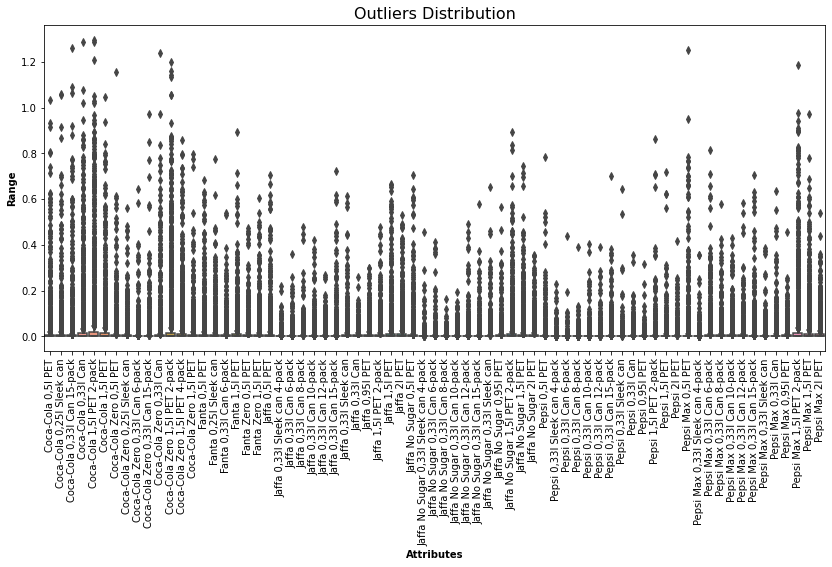

In [10]:
def show_boxplot(df):
    plt.rcParams['figure.figsize'] = [14,6]
    g = sns.boxplot(data = df, orient="v")
    plt.title("Outliers Distribution", fontsize = 16)
    plt.ylabel("Range", fontweight = 'bold')
    plt.xlabel("Attributes", fontweight = 'bold')
    g.tick_params(axis='x', rotation=90)
    

    
show_boxplot(data)

In [11]:
data.head()

Coca-Cola 0,5l PET  Coca-Cola 0,25l Sleek can  \
ID                                                    
2878            0.282215                   0.004441   
2881            0.006717                   0.012910   
2882            0.000675                   0.001698   
2884            0.003455                   0.006337   
2886            0.050186                   0.005718   

      Coca-Cola 0,33l Can 15-pack  Coca-Cola 0,33l Can  \
ID                                                       
2878                     0.012106             0.028150   
2881                     0.059791             0.009791   
2882                     0.042056             0.002441   
2884                     0.043434             0.013191   
2886                     0.004105             0.006571   

      Coca-Cola 1,5l PET 2-pack  Coca-Cola 1,5l PET  Coca-Cola Zero 0,5l PET  \
ID                                                                             
2878                   0.160348            0.028677                 0.031408   
2881                   0.032862            0.020404                 0.007766   
2882                   0.000936            0.000625                 0.000510   
2884                   0.004986            0.006468                 0.002578   
2886                   0.003021            0.009547                 0.094383   

      Coca-Cola Zero 0,25l Sleek can  Coca-Cola Zero 0,33l Can 6-pack  \
ID                                                                      
2878                        0.002895                         0.051033   
2881                        0.003422                         0.015516   
2882                        0.003577                         0.007988   
2884                        0.014796                         0.004300   
2886                        0.025450                         0.016448   

      Coca-Cola Zero 0,33l Can 15-pack  ...  Pepsi Max 0,33l Can 8-pack  \
ID                                      ...                               
2878                          0.007674  ...                    0.000067   
2881                          0.015304  ...                    0.002244   
2882                          0.127182  ...                    0.000219   
2884                          0.039316  ...                    0.000465   
2886                          0.049845  ...                    0.026746   

      Pepsi Max 0,33l Can 10-pack  Pepsi Max 0,33l Can 12-pack  \
ID                                                               
2878                     0.000080                     0.000167   
2881                     0.001900                     0.006142   
2882                     0.000942                     0.001243   
2884                     0.001017                     0.001681   
2886                     0.023528                     0.010860   

      Pepsi Max 0,33l Can 15-pack  Pepsi Max 0,33l Sleek can  \
ID                                                             
2878                     0.000033                   0.000068   
2881                     0.004223                   0.001092   
2882                     0.002537                   0.000297   
2884                     0.006326                   0.001324   
2886                     0.005492                   0.009881   

      Pepsi Max 0,33l Can  Pepsi Max 0,95l PET  Pepsi Max 1,5l PET 2-pack  \
ID                                                                          
2878             0.000115             0.000179                   0.000101   
2881             0.001074             0.003048                   0.003345   
2882             0.000141             0.000046                   0.000028   
2884             0.001289             0.001148                   0.000804   
2886             0.013335             0.015671                   0.006119   

      Pepsi Max 1,5l PET  Pepsi Max 2l PET  
ID                                          
2878            0.000089          0.000097  
2881            0.001485   

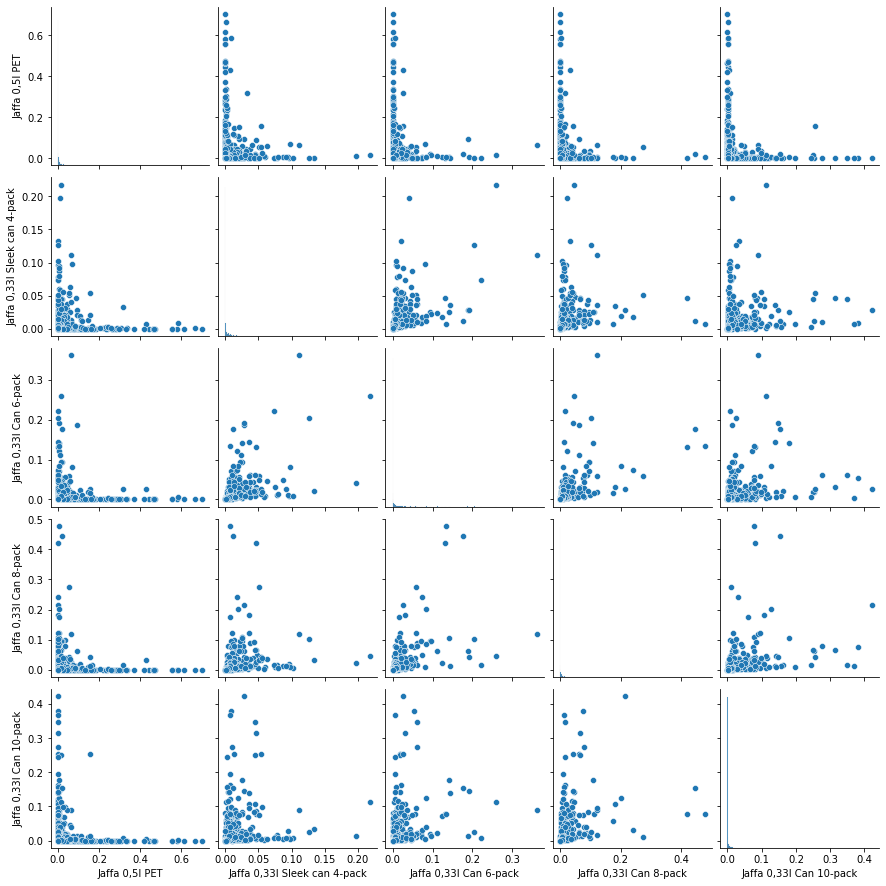

In [12]:
sns.pairplot(data.iloc[:,20:25])

In [13]:
values = data.values

### Data Distribution

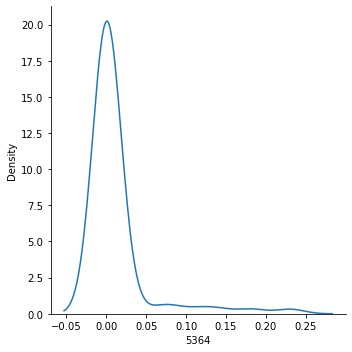

In [14]:
sns.displot(data=data, x = data.iloc[1400,:], kind='kde') 
plt.show()

> The data seems to centered around 0 with some outlying values. A histogram in which most of the data falls to the right of the graph's peak is known as a right-skewed histogram. It is also known as a positively skewed histogram. A right-skewed histogram has a definite relationship between its mean, median, and mode which can be written as mean > median > mode.

# With scaling

> It looks like our dataset doesn't have features on different scales. But, it is still worth to try scaling and apply clustering algorithms. 

In [15]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

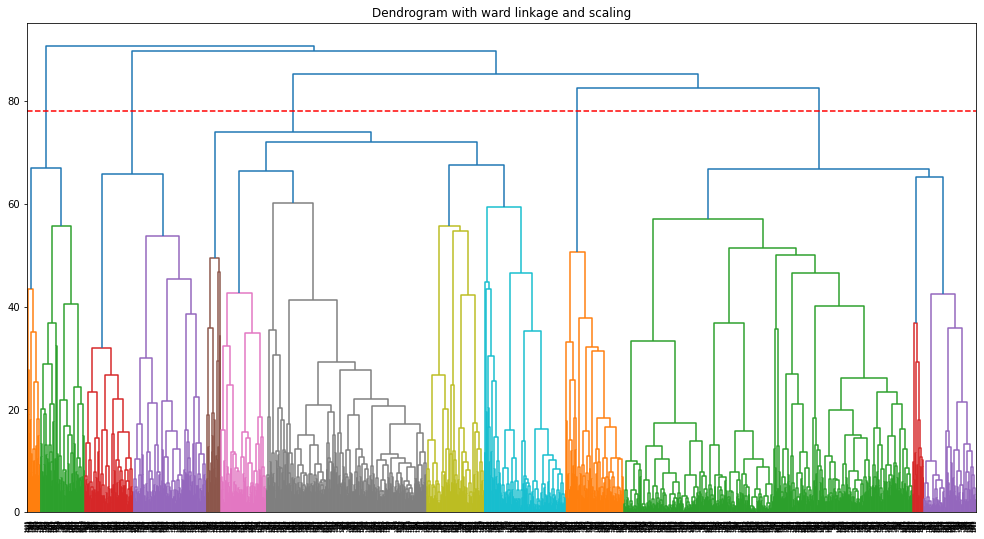

In [16]:
plt.figure(figsize=(17, 9))  
plt.title("Dendrogram with ward linkage and scaling")
linkage_matrix = linkage(data_scaled, method='ward', metric='euclidean')
dend = dendrogram(linkage_matrix, leaf_rotation=90.)
plt.axhline(y=78, color='r', linestyle='--')

# Creating dendrograms based on different linkage methods and distance metrics

In [19]:
def create_dendrogram(method, metric):
    linkage_matrix = linkage(values, method=method, metric=metric)
    dend = dendrogram(linkage_matrix, leaf_rotation=90.)

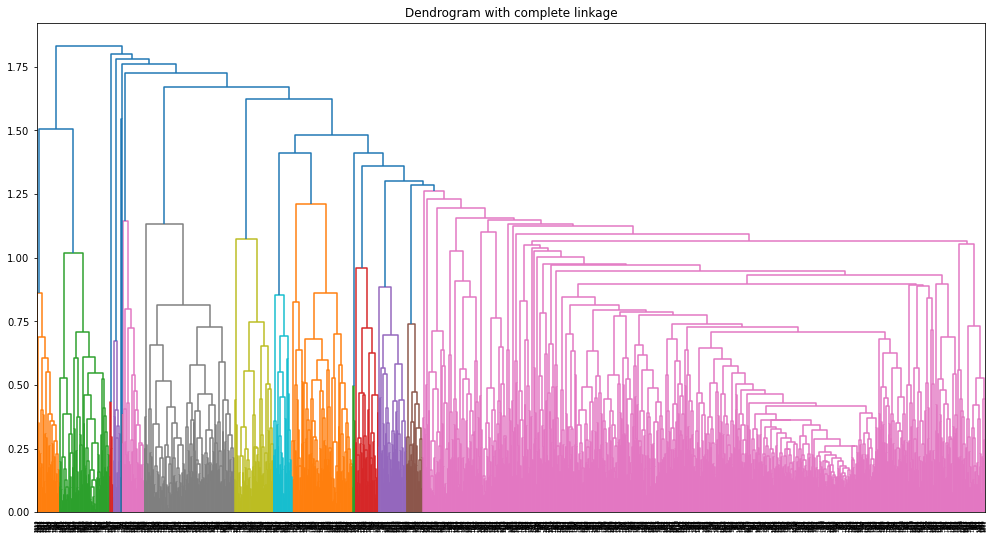

In [16]:
plt.figure(figsize=(17, 9))  
plt.title("Dendrogram with complete linkage")
create_dendrogram('complete', 'euclidean')

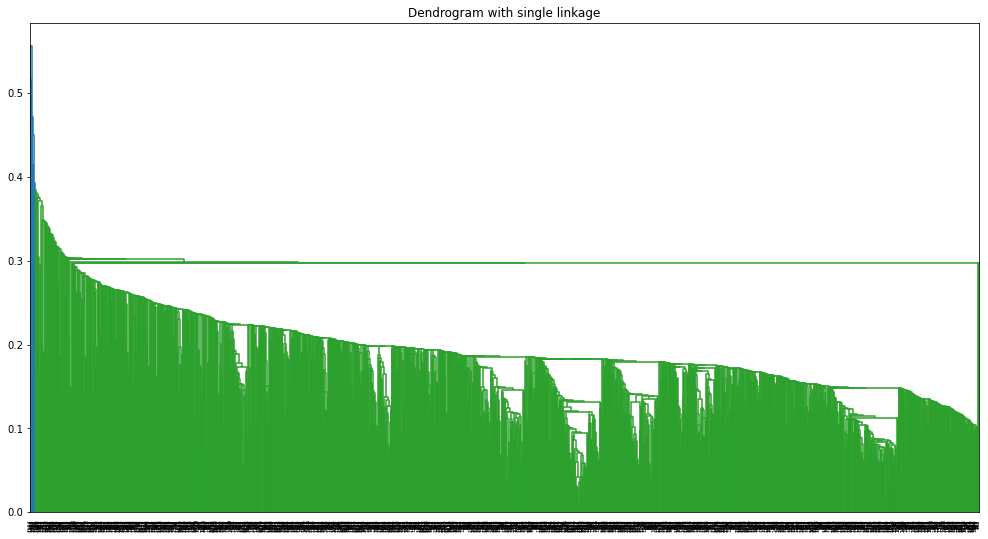

In [17]:
plt.figure(figsize=(17, 9))  
plt.title("Dendrogram with single linkage")
create_dendrogram('single', 'euclidean')

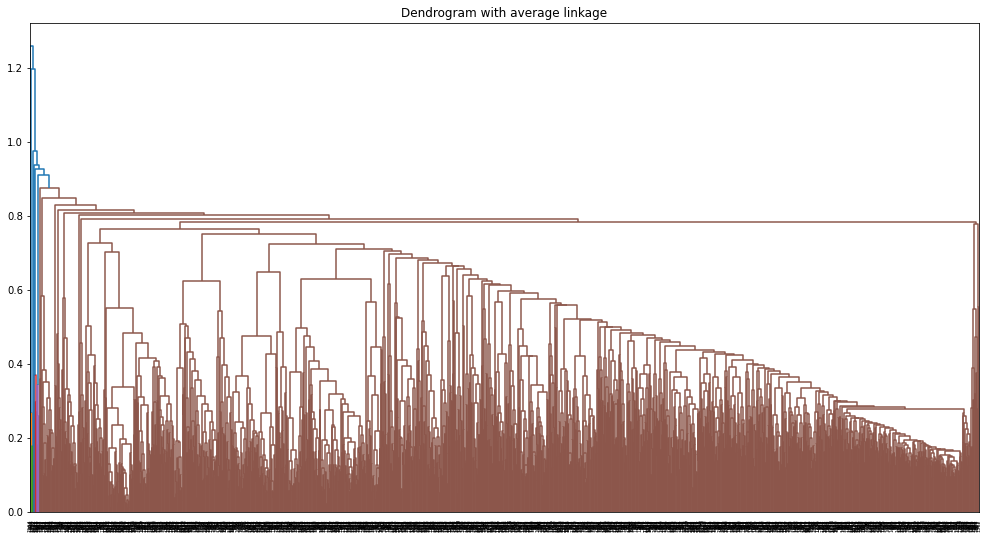

In [18]:
plt.figure(figsize=(17, 9))  
plt.title("Dendrogram with average linkage")
create_dendrogram('average', 'euclidean')

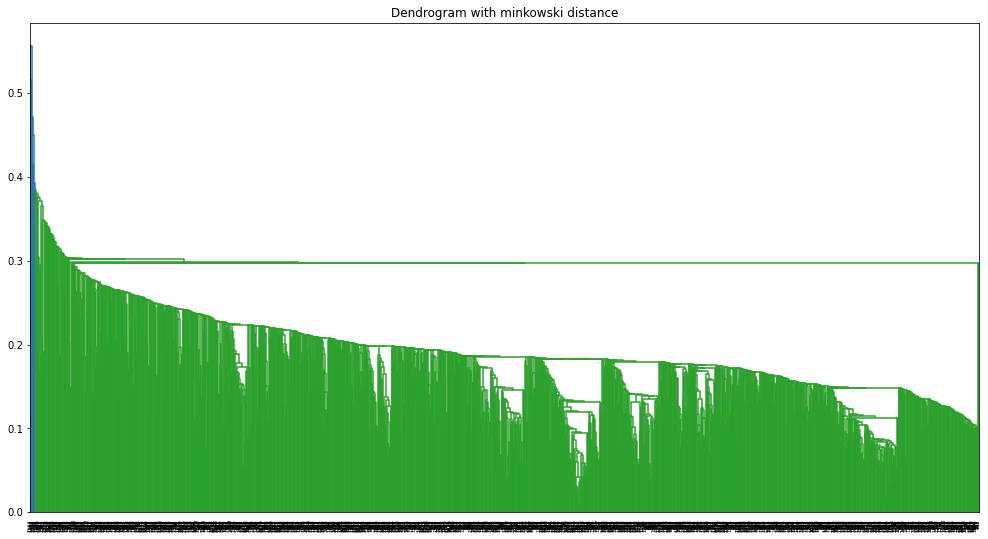

In [19]:
plt.figure(figsize=(17, 9))  
plt.title("Dendrogram with minkowski distance")
create_dendrogram('single', 'minkowski')

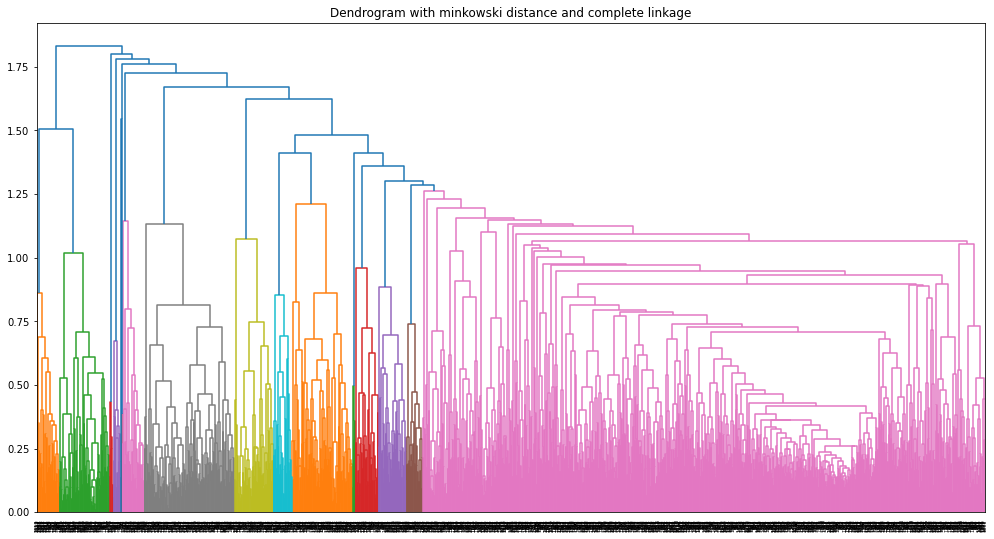

In [20]:
plt.figure(figsize=(17, 9))  
plt.title("Dendrogram with minkowski distance and complete linkage")
create_dendrogram('complete', 'minkowski')

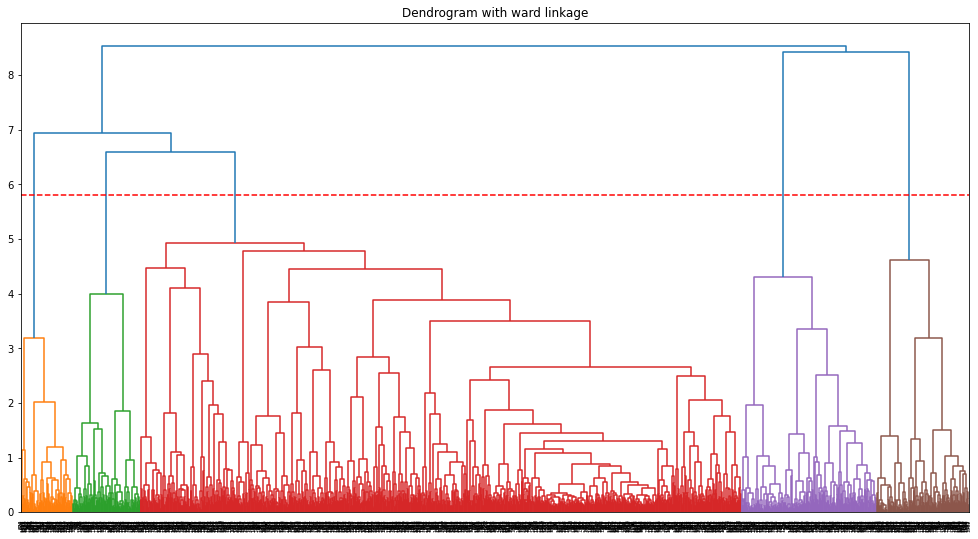

In [153]:
plt.figure(figsize=(17, 9))  
plt.title("Dendrogram with ward linkage")
create_dendrogram('ward', 'euclidean')
plt.axhline(y=5.8, color='r', linestyle='--')

> Based on the above dendrograms, it is reasonable to choose the number of clusters using ward linkage where it shows a clear segmentation between clusters. However, it is important to experiment and evaluate the options between three clusters and five clusters. 

D:\Softwares\Anaconda_Navigator\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


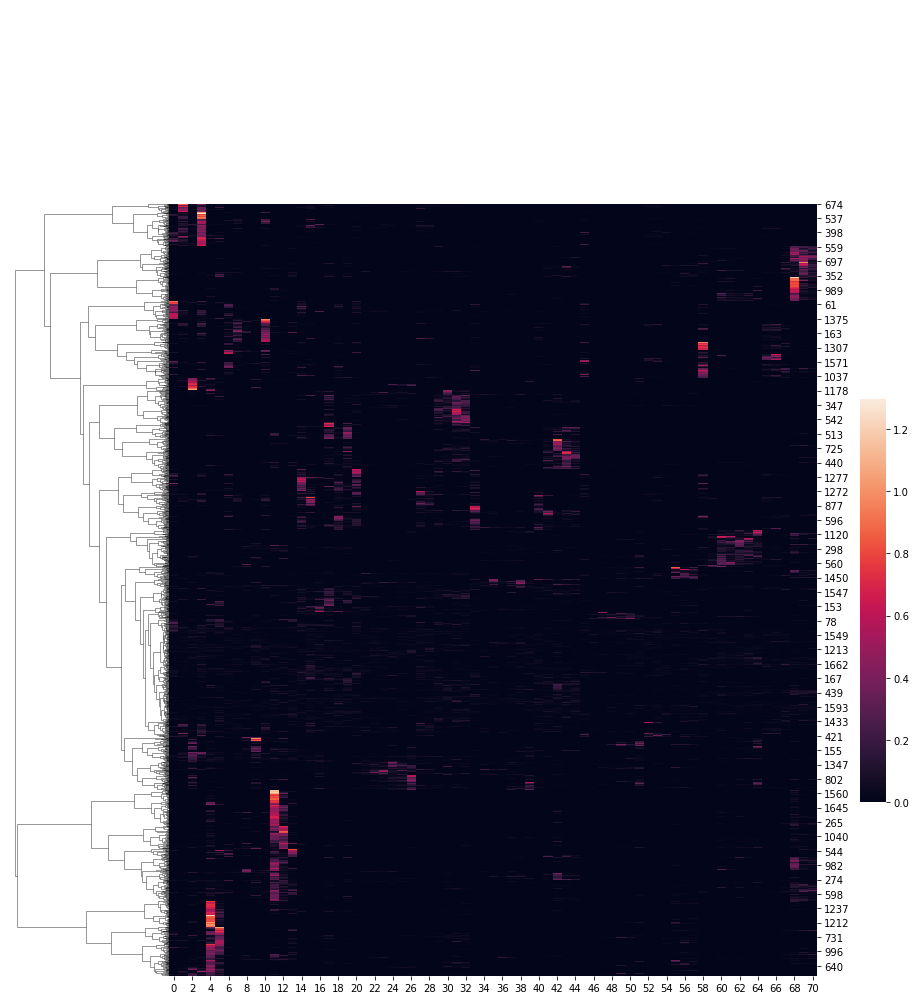

In [22]:
sns.clustermap(values,method='ward', 
               metric='euclidean', 
               col_cluster=False,
              figsize=(12, 14),
              cbar_pos=(1, .2, .03, .4),)

In [17]:
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("Perplexity 10", "Perplexity 30", "Perplexity 50", "Perplexity 100"))

perplexities= [10, 30, 50, 150]
reduced_Xarr = []

for i in range(len(perplexities)): 
    X_to_plot = TSNE(n_components=2, perplexity = perplexities[i], random_state=10).fit_transform(values)
    reduced_Xarr.append(X_to_plot)
    if (i == 0) or (i == 1):
        j = 1
        fig.add_trace(go.Scatter(x=X_to_plot[:,0], y=X_to_plot[:,1],mode="markers"), row=j, col=i+1)
    else:
        j=2
        i = i-1
        fig.add_trace(go.Scatter(x=X_to_plot[:,0], y=X_to_plot[:,1],mode="markers", ),row=j, col=i)
        i = i+1

In [18]:
fig.update_layout(height=700, width=800,
                  title_text="Cluster structure after dimensionality reduction",
                 showlegend=False)
fig.show()

> The above diagram shows the inherent pattern in this dataset based on different perplexity settings. Perplexity is a metric for how many neighbors a point has, and significantly affects the algorithm’s output.

In [19]:
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("Perplexity 10", "Perplexity 30", "Perplexity 50", "Perplexity 100"))

perplexities= [10, 30, 50, 150]
reduced_Xarr = []

for i in range(len(perplexities)): 
    X_to_plot = TSNE(n_components=2, perplexity = perplexities[i], random_state=42).fit_transform(data_scaled)
    reduced_Xarr.append(X_to_plot)
    if (i == 0) or (i == 1):
        j = 1
        fig.add_trace(go.Scatter(x=X_to_plot[:,0], y=X_to_plot[:,1],mode="markers"), row=j, col=i+1)
    else:
        j=2
        i = i-1
        fig.add_trace(go.Scatter(x=X_to_plot[:,0], y=X_to_plot[:,1],mode="markers", ),row=j, col=i)
        i = i+1

In [20]:
fig.update_layout(height=700, width=800,
                  title_text="Cluster structure after dimensionality reduction and scaling",
                 showlegend=False)
fig.show()

## Using PCA to reduce dimensionality

In [41]:
pca = PCA()
pcs = pca.fit_transform(data)

In [42]:
pca.explained_variance_ratio_.cumsum()

array([0.12430958, 0.24198508, 0.32517383, 0.39538101, 0.4390626 ,
       0.48229872, 0.52030092, 0.55609909, 0.58799076, 0.6166267 ,
       0.64381676, 0.67052035, 0.69453971, 0.7168654 , 0.73634016,
       0.7546539 , 0.77128746, 0.78626154, 0.80025669, 0.81309007,
       0.82580711, 0.83766457, 0.84886919, 0.85929938, 0.86927208,
       0.8788238 , 0.88674582, 0.89407889, 0.90066832, 0.90687238,
       0.91259063, 0.91812938, 0.92315306, 0.92794219, 0.93267457,
       0.93723583, 0.94152842, 0.94553657, 0.94937373, 0.95302681,
       0.95657845, 0.96005586, 0.96343896, 0.96674433, 0.96972817,
       0.97240775, 0.97501232, 0.9772988 , 0.97941082, 0.98148288,
       0.98347058, 0.98531974, 0.98709728, 0.98876247, 0.98999418,
       0.99097885, 0.99194804, 0.99289162, 0.99381154, 0.99462321,
       0.99539497, 0.99610991, 0.99678233, 0.99734912, 0.99788056,
       0.99839283, 0.99884722, 0.9992355 , 0.99956665, 0.99982568,
       1.        ])

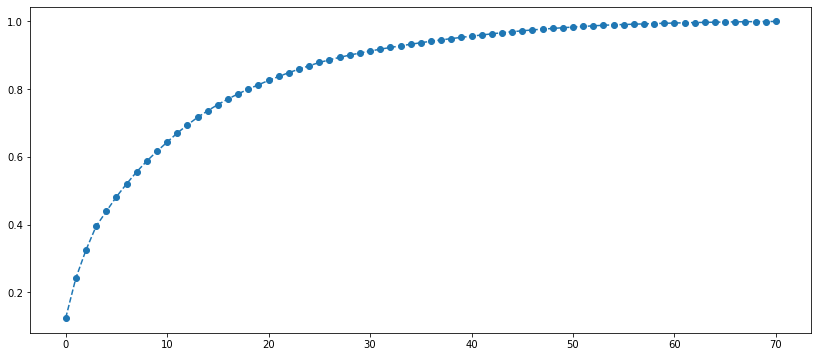

In [43]:
plt.plot(range(len(data.columns)), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle = "--")

In [31]:
pca = PCA(n_components=50)
X_PCA = pca.fit_transform(values)

In [32]:
pca.explained_variance_ratio_.cumsum()

array([0.12430958, 0.24198508, 0.32517383, 0.39538101, 0.4390626 ,
       0.48229872, 0.52030092, 0.55609909, 0.58799076, 0.6166267 ,
       0.64381676, 0.67052035, 0.69453971, 0.7168654 , 0.73634016,
       0.7546539 , 0.77128746, 0.78626154, 0.80025669, 0.81309007,
       0.82580711, 0.83766457, 0.84886919, 0.85929938, 0.86927208,
       0.8788238 , 0.88674582, 0.89407889, 0.90066832, 0.90687238,
       0.91259063, 0.91812938, 0.92315306, 0.92794219, 0.93267457,
       0.93723582, 0.94152842, 0.94553657, 0.94937373, 0.9530268 ,
       0.95657843, 0.96005584, 0.96343893, 0.9667443 , 0.96972813,
       0.97240768, 0.9750122 , 0.97729865, 0.97941045, 0.98148235])

> There isn't much information provided by the first principal components and hence it would be hard to visualize and reduce the dimensions. We will go forward with all the features present in our dataset.

In [33]:
# fig = plt.figure(figsize = (5,4))
# ax = fig.add_subplot(111)

# ax.scatter(X_PCA[:,44], X_PCA[:,45], alpha = 0.3)
# plt.title('Method: PCA')
# #plt.savefig('PCA.png', dpi = 300)
# plt.show()

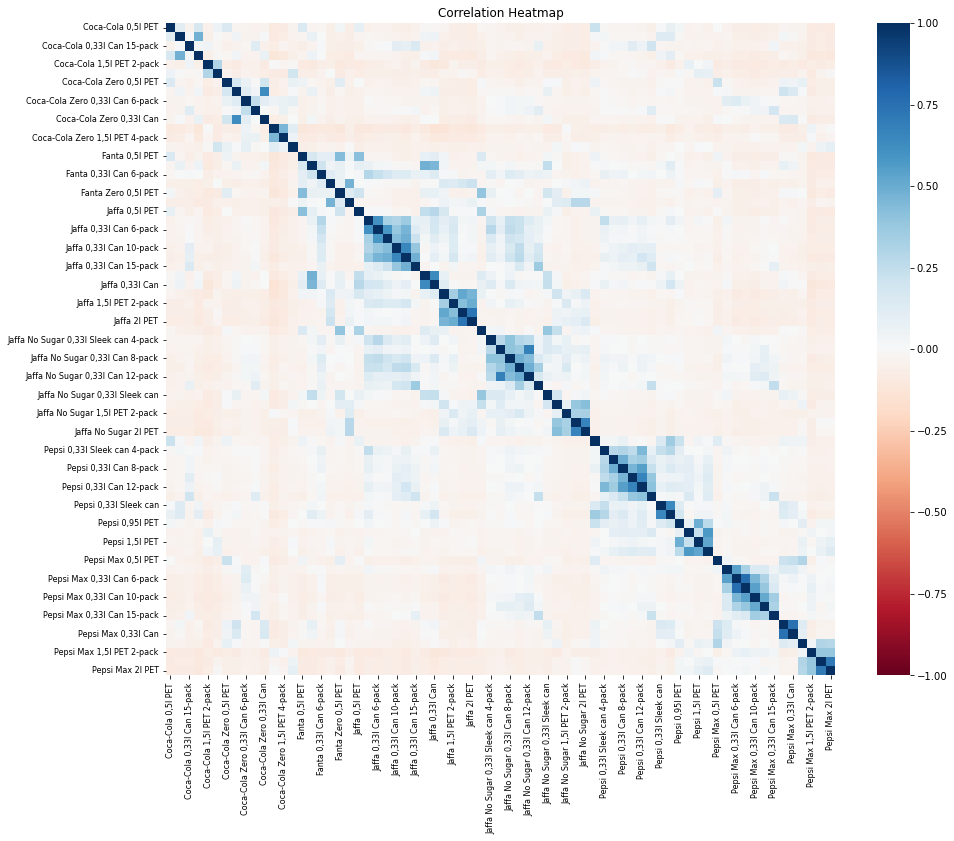

In [131]:
plt.figure(figsize=(15,12))
s=sns.heatmap(data.corr(), cmap='RdBu', vmin=-1, vmax=1)
s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=8)
s.set_xticklabels(s.get_xticklabels(), rotation=90, fontsize=8)
plt.title("Correlation Heatmap")
plt.show()

# 5 clusters

In [34]:
hc_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward' ,compute_distances= True)  
clusters_5 = hc_cluster.fit_predict(values)

In [35]:
data = pd.concat([data, pd.Series(clusters_5, name = 'cluster_5', index= data.index )], axis=1  ) 

In [36]:
data.cluster_5.value_counts()

0    1055
2     238
1     162
4     118
3      92
Name: cluster_5, dtype: int64

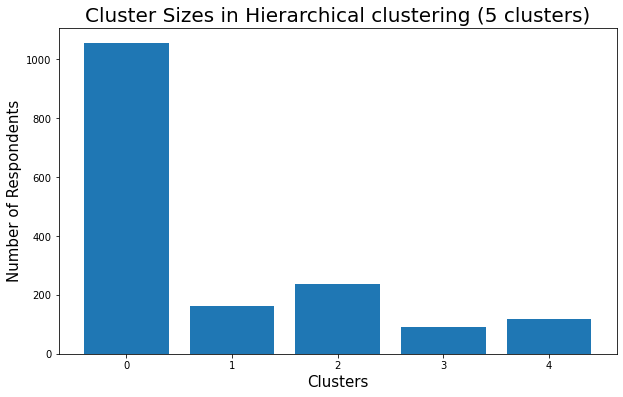

In [37]:
# Count the number of respondents in each cluster
cluster_sizes = pd.Series(clusters_5).value_counts()

# Create a bar chart for cluster sizes
plt.figure(figsize=(10, 6))
plt.bar(cluster_sizes.index, cluster_sizes.values)
plt.xlabel('Clusters',fontdict={'fontsize':15})
plt.ylabel('Number of Respondents',fontdict={'fontsize':15})
plt.title('Cluster Sizes in Hierarchical clustering (5 clusters)', fontdict={'fontsize':20})
plt.show()

### Descriptive Statistics of clusters

In [38]:
# Calculate descriptive statistics for each cluster
cluster_statistics_5 = data.groupby('cluster_5').describe()

In [39]:
col_names = list(data.columns[:-1])

In [40]:
def plot_softdrink(soft_drink):
    
    # Calculate average preferences for the selected softdrink within each cluster
    softdrink_preferences = cluster_statistics_5[soft_drink]['mean']
    
    # Create a bar chart for average preferences
    fig = px.bar(y=softdrink_preferences.values, x=softdrink_preferences.index, orientation='v',
                 labels={'x': 'Clusters', 'y': 'Average Preference'})
#     fig.update_layout(height=750) 
#     fig.update_yaxes(tickfont=dict(size=10))
    fig.update_layout(title=f'Average cluster preference for {soft_drink}' )
    fig.show()

# Define a dropdown widget for selecting the cluster
softdrink_dropdown = widgets.Dropdown(options=col_names, description='Select Soft drink:')

# Create an interactive plot
interactive_plot = interactive(plot_softdrink, soft_drink=softdrink_dropdown)
interactive_plot

interactive(children=(Dropdown(description='Select Soft drink:', options=('Coca-Cola 0,5l PET', 'Coca-Cola 0,2…

In [41]:
def plot_cluster(cluster_number):
    # Calculate average preferences for the selected cluster
    
    cluster_preferences = data[data.cluster_5 == cluster_number][col_names].mean()
    
    # Create a bar chart for average preferences
    fig = px.bar(y=cluster_preferences.index, x=cluster_preferences.values, orientation='h',
                 labels={'y': 'Soft Drink Category', 'x': 'Average Preference'})
    fig.update_layout(height=750) 
    fig.update_yaxes(tickfont=dict(size=10))
    fig.update_layout(title=f'Average Preferences in Cluster {cluster_number}' )
    fig.show()

# Define a dropdown widget for selecting the cluster
cluster_dropdown = widgets.Dropdown(options=cluster_sizes.index, description='Select Cluster:')

# Create an interactive plot
interactive_plot = interactive(plot_cluster, cluster_number=cluster_dropdown)
interactive_plot

interactive(children=(Dropdown(description='Select Cluster:', options=(0, 2, 1, 4, 3), value=0), Output()), _d…

# 3 Clusters

In [42]:
hc_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward', compute_distances= True)  
clusters_3 = hc_cluster.fit_predict(values)

In [43]:
data = pd.concat([data, pd.Series(clusters_3, name = 'cluster_3', index= data.index )], axis=1  ) 

In [45]:
pd.Series(clusters_3).value_counts()

0    1265
2     238
1     162
dtype: int64

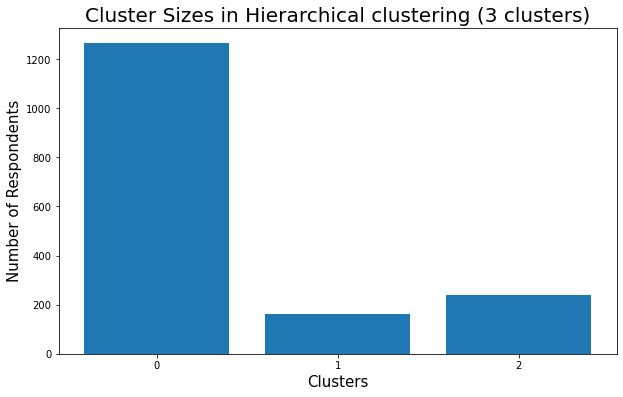

In [46]:
# Count the number of respondents in each cluster
cluster_sizes = pd.Series(clusters_3).value_counts()

# Create a bar chart for cluster sizes
plt.figure(figsize=(10, 6))
plt.bar(x = cluster_sizes.index, height= cluster_sizes.values)
plt.xticks(range(3))
plt.xlabel('Clusters',fontdict={'fontsize':15})
plt.ylabel('Number of Respondents',fontdict={'fontsize':15})
plt.title('Cluster Sizes in Hierarchical clustering (3 clusters)' , fontdict={'fontsize':20})
plt.show()

In [47]:
def plot_cluster(cluster_number):
    # Calculate average preferences for the selected cluster
    
    cluster_preferences = data[data.cluster_3 == cluster_number][col_names].mean()
    
    # Create a bar chart for average preferences
    fig = px.bar(y=cluster_preferences.index, x=cluster_preferences.values, orientation='h',
                 labels={'y': 'Soft Drink Category', 'x': 'Average Preference'})
    fig.update_layout(height=750) 
    fig.update_yaxes(tickfont=dict(size=10))
    fig.update_layout(title=f'Average Preferences in Cluster {cluster_number}' )
    fig.show()

# Define a dropdown widget for selecting the cluster
cluster_dropdown = widgets.Dropdown(options=cluster_sizes.index, description='Select Cluster:')

# Create an interactive plot
interactive_plot = interactive(plot_cluster, cluster_number=cluster_dropdown)
interactive_plot

interactive(children=(Dropdown(description='Select Cluster:', options=(0, 2, 1), value=0), Output()), _dom_cla…

# KMeans algorithm

In [27]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=24)
    kmeans.fit(values)
    wcss.append(kmeans.inertia_)

D:\Softwares\Anaconda_Navigator\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.



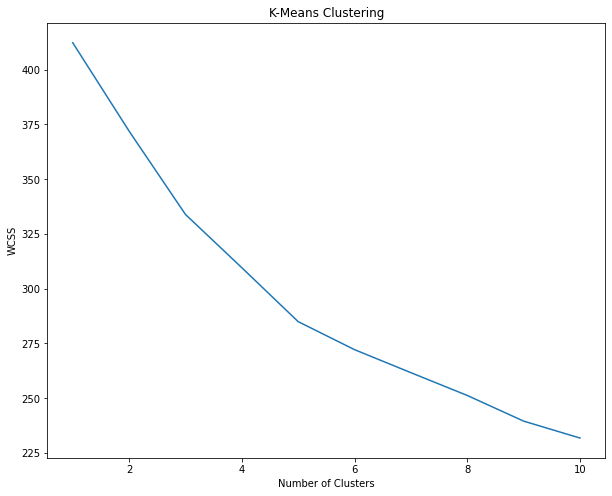

In [30]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-Means Clustering")
plt.show()

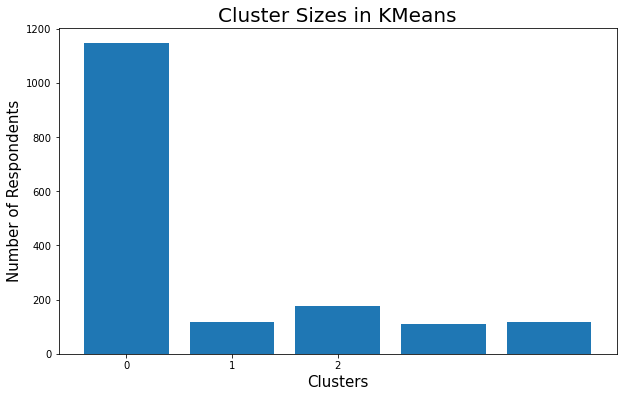

In [49]:
# The random_state needs to be the same number to get reproducible results
kmeans = KMeans(n_clusters=5, random_state=10) 
kmeans.fit(data.loc[:, col_names])
cluster_kmean = kmeans.labels_

# Count the number of respondents in each cluster
cluster_sizes = pd.Series(cluster_kmean).value_counts()

# Create a bar chart for cluster sizes
plt.figure(figsize=(10, 6))
plt.bar(cluster_sizes.index, cluster_sizes.values)
plt.xticks(range(3))
plt.xlabel('Clusters',fontdict={'fontsize':15})
plt.ylabel('Number of Respondents',fontdict={'fontsize':15})
plt.title('Cluster Sizes in KMeans', fontdict={'fontsize':20})
plt.show()

data = pd.concat([data, pd.Series(cluster_kmean, name = 'cluster_kmean', index= data.index )], axis=1  ) 

### Descriptive statistics of clusters

In [90]:
data.drop('cluster_kmean', axis=1, inplace = True)

In [50]:
# Calculate descriptive statistics for each cluster
cluster_statistics_kmean = data.groupby('cluster_kmean').describe()

# Display statistics for a specific cluster (replace 'cluster_number' with the desired cluster number)
# cluster_statistics.loc[4]
cluster_statistics_kmean

Coca-Cola 0,5l PET                                    \
                           count      mean       std           min   
cluster_kmean                                                        
0                         1146.0  0.025529  0.089856  6.316837e-10   
1                          116.0  0.092051  0.172473  4.640432e-04   
2                          175.0  0.000633  0.005738  1.160398e-10   
3                          111.0  0.000082  0.000336  2.140264e-10   
4                          117.0  0.013512  0.041070  7.357056e-07   

                                                               \
                        25%           50%       75%       max   
cluster_kmean                                                   
0              3.167364e-05  5.724592e-04  0.007622  0.934235   
1              7.660525e-03  2.621900e-02  0.095591  1.034729   
2              1.529990e-07  3.081571e-06  0.000017  0.074875   
3              1.369453e-08  2.746053e-07  0.000009  0.002456   
4              2.587828e-05  4.992106e-04  0.005903  0.282791   

              Coca-Cola 0,25l Sleek can            ... cluster_5       \
                                  count      mean  ...       75%  max   
cluster_kmean                                      ...                  
0                                1146.0  0.008803  ...       0.0  4.0   
1                                 116.0  0.205986  ...       3.0  3.0   
2                                 175.0  0.000352  ...       2.0  2.0   
3                                 111.0  0.000185  ...       4.0  4.0   
4                                 117.0  0.006390  ...       1.0  2.0   

              cluster_3                                               
                  count      mean       std  min  25%  50%  75%  max  
cluster_kmean                                                         
0                1146.0  0.135253  0.463550  0.0  0.0  0.0  0.0  2.0  
1                 116.0  0.017241  0.130734  0.0  0.0  0.0  0.0  1.0  
2                 175.0  1.971429  0.198517  0.0  2.0  2.0  2.0  2.0  
3                 111.0  0.180180  0.575219  0.0  0.0  0.0  0.0  2.0  
4                 117.0  0.991453  0.160588  0.0  1.0  1.0  1.0  2.0  

[5 rows x 584 columns]

In [92]:
cu = list(data.columns)
cu.remove('cluster')
cu.remove('cluster_kmean')

### Visualizating cluster characterstics

In [51]:
def plot_cluster(cluster_number):
    # Calculate average preferences for the selected cluster
    cluster_preferences = data[data.cluster_kmean == cluster_number][col_names].mean()
    
    # Create a bar chart for average preferences
    fig = px.bar(y=cluster_preferences.index, x=cluster_preferences.values, orientation='h',
                 labels={'y': 'Soft Drink Category', 'x': 'Average Preference'})
    fig.update_layout(height=750) 
    fig.update_yaxes(tickfont=dict(size=10))
    fig.update_layout(title=f'Average Preferences in Cluster {cluster_number}' )
    fig.show()

# Define a dropdown widget for selecting the cluster
cluster_dropdown = widgets.Dropdown(options=cluster_sizes.index, description='Select Cluster:')

# Create an interactive plot
interactive_plot = interactive(plot_cluster, cluster_number=cluster_dropdown)
interactive_plot

interactive(children=(Dropdown(description='Select Cluster:', options=(0, 2, 4, 1, 3), value=0), Output()), _d…

In [55]:
def plot_softdrink(soft_drink):
    
    # Calculate average preferences for the selected softdrink within each cluster
    softdrink_preferences = cluster_statistics_kmean[soft_drink]['mean']
    
    # Create a bar chart for average preferences
    fig = px.bar(y=softdrink_preferences.values, x=softdrink_preferences.index, orientation='v',
                 labels={'x': 'Clusters', 'y': 'Average Preference'})
#     fig.update_layout(height=750) 
#     fig.update_yaxes(tickfont=dict(size=10))
    fig.update_layout(title=f'Average cluster preference for {soft_drink}' )
    fig.show()

# Define a dropdown widget for selecting the cluster
softdrink_dropdown = widgets.Dropdown(options=col_names, description='Select Soft drink:')

In [56]:
# Create an interactive plot
interactive_plot = interactive(plot_softdrink, soft_drink=softdrink_dropdown)
interactive_plot

interactive(children=(Dropdown(description='Select Soft drink:', options=('Coca-Cola 0,5l PET', 'Coca-Cola 0,2…